# Análisis y Tratamiento Digital de Imágenes Satelitales: TP1
## Alumno: Kevin Hansen

La notebook irá resolviendo los puntos del trabajo práctico uno por uno. Se espera que se ejecuten las celdas en forma consecutiva, y están armadas de tal manera, que a excepción de los últimos dos puntos donde el usuario debe realizar inputs, el resto funcionará de la manera esperada por la consigna.  
En el caso de las imagenes utilizadas, una vez descargadas en los primeros puntos, serán reutilizadas por los demás, creando copias de las mismas en los casos en que fuese necesario.

Descomentar y ejecutar las próximas líneas si no se tienen las librerías instaladas.

In [1]:
# # Instalo librerías
# !pip install opencv-python
# !pip install matplotlib
# !pip install scikit-image
# !pip install scipy
# !pip install --upgrade numpy
# !pip install scikit-learn

In [1]:
# Importo librerías
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### 2)  Implementar un programa que realice las siguientes operaciones con imágenes en formato raw, pgm, ppm, jpg y una imagen satelital:

En este ejemplo inicial, se aplicará la consigna a un caso jpg, aunque luego a lo largo del trabajo práctico se utilizarán estas mismas funciones para interactuar con imágenes satelitales.

### a) Cargar una imagen de un archivo y desplegarla.

Al utilizar la librería de opencv, se abrirán las imágenes en una ventana nueva emergente. Por favor, cerrar la imagen una vez visualizada.

In [2]:
# Cargo imagen
image_name = 'DSC_1088.jpg'
image = cv2.imread(f'./Imagenes/RGB/{image_name}')


# Parametros para reescalar la imagen para verla bien en la pantalla
height, width = image.shape[:2]
new_height = height // 5
new_width = width // 5

# Reescalo los índices
image_small = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Imprimo imagen
cv2.imshow('image', image_small)
cv2.waitKey(0)

-1

### b)  Guardar una imagen a un archivo.

In [5]:
duplicate_name = f'copia_{image_name}'
cv2.imwrite(f'./Imagenes/RGB/{duplicate_name}', image)

True

### c) Obtener el valor de un pixel en una imagen.

In [6]:
pixel_value = image[100, 100]
print(pixel_value)

[132 142 152]


### d)  Copiar una parte de la imagen en otra imagen nueva.

In [8]:
cropped_image = image[1000:1200, 1000:1200]
cv2.imshow('cropped_image', cropped_image)
cv2.waitKey(0)

-1

### e) Guardar la imagen cortada con otro nombre.

In [9]:
cropped_name = f'cropped_{image_name}'
cv2.imwrite(f'./Imagenes/RGB/{cropped_name}', cropped_image)

True

### 3) Implementar un programa que marque una región dentro de la imagen e informe la cantidad de pixels de la región y el promedio de los niveles de gris o el promedio del color si es una imagen en color.


In [10]:
# Creo copia de imagen original
image_copy = np.copy(image_small)

# Definir la región de interés
x, y, w, h = 300, 200, 100, 100
roi = image_copy[y:y+h, x:x+w]

# Dibujo rectángulo alrededor de la región de interés
cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Calculo la cantidad de pixels
num_pixels = roi.size

# Calculo el color promedio
avg_color = cv2.mean(roi)[:3]

# Imprimo resultados
print(f'Número de pixels en ROI: {num_pixels}')
print(f'Valor promedio para ROI: {avg_color}')

# Imprimo imagen con región de interés marcada
cv2.imshow('image', image_copy)
cv2.waitKey(0)

Número de pixels en ROI: 30000
Valor promedio para ROI: (113.78880000000001, 146.20440000000002, 154.5842)


-1

###  4) Implementar un programa que marque una región dentro de una imagen satelital e informe la cantidad de pixels de la región, la cantidad de bandas y el promedio de cada banda dentro de la región.

In [7]:
# Defino el número de bandas de la imagen
num_bands = 11

# Inicializo lista de bandas
bands = []

# Cargo cada banda que corresponde a un archivo
for i in range(1, num_bands + 1):
    band = cv2.imread(f'./Imagenes/Landsat/LC09_L1TP_230093_20221102_20230323_02_T1_B{i}.TIF', cv2.IMREAD_UNCHANGED)

    # Establezco valores para reescalar la imagen y poder visualizarla
    height, width = band.shape[:2]
    new_height = height // 15
    new_width = width // 15

    # Reescalo los índices
    band_small = cv2.resize(band, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Downsample de banda 8 para alinear su resolución al resto
    if i == 8:
        height, width = bands[0].shape[:2]
        band_small = cv2.resize(band_small, (width, height), interpolation=cv2.INTER_AREA)

    bands.append(band_small)

# Combino las bandas en una única imagen
landsat = np.dstack(bands)

# Defino región de interés
x, y, w, h = 200, 200, 100, 100
roi = landsat[y:y+h, x:x+w]

# Calculo el número de pixels de la región
num_pixels = roi.shape[0] * roi.shape[1]

# Calculo el número de bandas de la imagen
num_bands = roi.shape[2]

# Calculo el valor promedio de cada banda para la región de interés
avg_values = [np.mean(roi[:, :, i]) for i in range(num_bands)]

# Imprimo resultados
print(f'Número de pixels en ROI: {num_pixels}')
print(f'Número de bandas: {num_bands}')
print(f'Valor promedio de banda para ROI: {avg_values}')

# Extraigo una de las bandas
band = landsat[:, :, 1]

# Convierto el tipo de objeto de la banda
band = cv2.UMat(band)

# Dibujo un rectángulo que marca la región de interés
cv2.rectangle(band, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Imprimo imagen con región de interés marcada
cv2.imshow('Band 2', band)
# Muevo la ventana para poder arrastrarla
cv2.moveWindow('Band 2', 100, 200)
cv2.waitKey(0)

Número de pixels en ROI: 10000
Número de bandas: 11
Valor promedio de banda para ROI: [10481.5276, 10069.7141, 9990.507, 10645.6309, 12385.9067, 13643.6402, 12462.746, 10151.7634, 5057.4515, 26808.0659, 26555.1624]


-1

### 5) Dada una imagen satelital separada en bandas, calcular los índices NDVI, NDWI y SVI y mostrarlos como imágenes.

In [31]:
# Establezco coeficientes de calibración para cada banda en base al archivo de metadata
mult_band_2 = 2.0000E-05
add_band_2 = -0.100000
mult_band_3 = 2.0000E-05
add_band_3 = -0.100000
mult_band_4 = 2.0000E-05
add_band_4 = -0.100000
mult_band_5 = 2.0000E-05
add_band_5 = -0.100000

# Divido la imagen en las bandas que voy a utilizar
blue_band = landsat[:, :, 1] * mult_band_2 + add_band_2
green_band = landsat[:, :, 2] * mult_band_3 + add_band_3
red_band = landsat[:, :, 3] * mult_band_4 + add_band_4
nir_band = landsat[:, :, 4] * mult_band_5 + add_band_5

# Valido los valores de input de las bandas
print(f'Blue band: min={np.min(blue_band)}, max={np.max(blue_band)}')
print(f'Green band: min={np.min(green_band)}, max={np.max(green_band)}')
print(f'Red band: min={np.min(red_band)}, max={np.max(red_band)}')
print(f'NIR band: min={np.min(nir_band)}, max={np.max(nir_band)}')

# Calculo NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Calculo NDWI
ndwi = (green_band - nir_band) / (green_band + nir_band)

# Calculo SAVI
L = 0.5 # L factor de ajuste
savi = ((nir_band - red_band) / (nir_band + red_band + L)) * (1 + L)

# Valido los valores obtenidos para los índices
print(f'NDVI: min={np.min(ndvi)}, max={np.max(ndvi)}')
print(f'NDWI: min={np.min(ndwi)}, max={np.max(ndwi)}')
print(f'SAVI: min={np.min(savi)}, max={np.max(savi)}')

# Clipeo para que queden dentro del rango correcto
ndvi = np.clip(ndvi, -1, 1)
ndwi = np.clip(ndwi, -1, 1)
savi = np.clip(savi, -1, 1)

# Ajusto el contraste de cada uno
ndvi = exposure.rescale_intensity(ndvi, out_range=(0, 1))
ndwi = exposure.rescale_intensity(ndwi, out_range=(0, 1))
savi = exposure.rescale_intensity(savi, out_range=(0, 1))

# Imprimo los índices
cv2.imshow('NDVI', ndvi)
cv2.imshow('NDWI', ndwi)
cv2.imshow('SAVI', savi)
cv2.imshow('NDVI_norm', ndvi_normalized)
cv2.imshow('NDWI_norm', ndwi_normalized)
cv2.imshow('SAVI_norm', savi_normalized)
cv2.waitKey(0)

Blue band: min=-0.1, max=0.7428400000000001
Green band: min=-0.1, max=0.7413000000000001
Red band: min=-0.1, max=0.7585000000000001
NIR band: min=-0.1, max=0.6484200000000001
NDVI: min=-125.40000000001376, max=318.99999999995765
NDWI: min=-199.33333333331836, max=1212.0000000000496
SAVI: min=-0.2236338522632442, max=0.36123397556038683
NDVI: min=0.0, max=1.0
NDWI: min=0.0, max=1.0
SAVI: min=0.0, max=1.0


-1

### 6) Implementar la función de potencia γ, 0 < γ < 2 y γ ̸= 1 y aplicarla a la imagen del índice NDVI. Variar el valor de γ para observar los resultados.

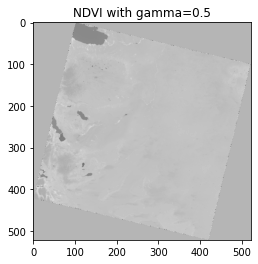

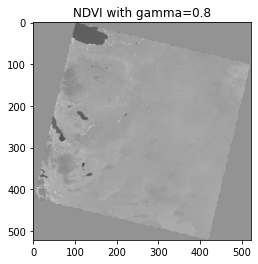

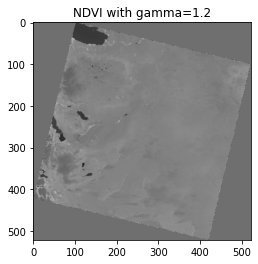

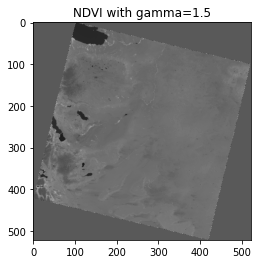

In [13]:
# Aplico función gamma con distintos valores
gamma_values = [0.5, 0.8, 1.2, 1.5]
for gamma in gamma_values:
    ndvi_gamma = exposure.adjust_gamma(ndvi, gamma=gamma)

    # Imprimo resultados
    plt.imshow(ndvi_gamma, cmap='gray')
    plt.title(f'NDVI with gamma={gamma}')
    plt.show()

### 7)  Implementar una función que devuelva el negativo de una imagen y aplicarlo a una imagen RGB banda por banda.

In [3]:
# Función de negativo
def negative_image(image):
    # Divido la imagen en bandas
    bands = cv2.split(image)

    # Aplico el negativo a cada banda
    negative_bands = []
    for band in bands:
        # Calculo el valor maximo del pixel para la banda
        max_value = np.iinfo(band.dtype).max

        # Calculo el negativo para la banda
        negative_band = max_value - band

        # Agrego la banda negativa a la lista
        negative_bands.append(negative_band)

    # Junto los negativos para formar la imagen nuevamente
    negative = cv2.merge(negative_bands)

    return negative

# Aplico el negativo a la imagen completa
negative = negative_image(image_small)

# Muestro ambos para comparar
cv2.imshow('Original', image_small)
cv2.imshow('Negative', negative)
cv2.waitKey(0)


-1

### 8)  Implementar una función que devuelva el histograma de niveles de gris de cada banda de una imagen.

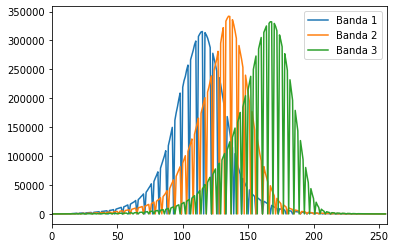

In [16]:
# Función de histograma
def image_histogram(image):
    # Divido la imagen en bandas
    bands = cv2.split(image)

    # Calculo el histograma para cada banda
    for i, band in enumerate(bands):
        # Normalizo la banda para que vaya de 0 a 255
        normalized_band = cv2.normalize(band, None, 0, 255, cv2.NORM_MINMAX)
        
        # Calculo sobre el normalizado
        hist = cv2.calcHist([normalized_band], [0], None, [256], [0, 256])
        plt.plot(hist, label=f'Banda {i+1}')

    # Muestro el histograma
    plt.xlim([0, 256])
    plt.legend()
    plt.show()

# Aplico la funcion a mi imagen original
image_histogram(image)


### 9) Implementar una función que aplique un umbral a cada banda de una imagen, devolviendo una imagen binaria para cada una.

In [19]:
# Función de umbral
def threshold_image(image, threshold):
    # Divido la imagen en bandas
    bands = cv2.split(image)

    # Aplico el umbral a cada banda
    binary_bands = []
    for band in bands:
        # Normalizo la banda para que vaya de 0 a 255
        normalized_band = cv2.normalize(band, None, 0, 255, cv2.NORM_MINMAX)

        # Aplico el umbral a la banda normalizada
        _, binary_band = cv2.threshold(normalized_band, threshold, 255, cv2.THRESH_BINARY)
        binary_bands.append(binary_band)

    return binary_bands

# Aplico el umbral de 140 a mi imagen original
binary_bands = threshold_image(image_small, 140)

# Muestro las bandas
for i, binary_band in enumerate(binary_bands):
    cv2.imshow(f'Banda binaria {i+1}', binary_band)
cv2.waitKey(0)


-1

### 10) Implementar una función que realice la ecualización del histograma para mejorar la imágen, realizar la operación banda por banda y en la imagen del índice NDVI, observar los resultados.

In [23]:
# Función de ecualización
def equalize_histogram(image):
    # Obtengo el número de bandas de la imagen
    num_bands = image.shape[2] if len(image.shape) == 3 else 1

    # Caso para imagen de una banda (indices)
    if num_bands == 1:
        equalized = cv2.equalizeHist(image)
    else:
        # Divido si tiene mas de una banda
        bands = cv2.split(image)

        # Ecualizo para cada banda
        equalized_bands = [cv2.equalizeHist(band) for band in bands]

        # Vuelvo a juntar
        equalized = cv2.merge(equalized_bands)

    return equalized

# Ecualizo imagen original
equalized = equalize_histogram(image_small)

# Muestro original y ecualizada
cv2.imshow('image_original', image_small)
cv2.imshow('image_equalized', equalized)
cv2.waitKey(0)

# Normalizo NDVI [0, 255]
ndvi_normalized = cv2.normalize(ndvi, None, 0, 255, cv2.NORM_MINMAX)

# Convierto en formato para poder ecualizar
ndvi_8bit = np.uint8(ndvi_normalized)

# Ecualizo NDVI
ndvi_equalized = equalize_histogram(ndvi_8bit)

# Muestro original y ecualizado
cv2.imshow('NDVI_original', ndvi)
cv2.imshow('NDVI_equalized', ndvi_equalized)
cv2.waitKey(0)


-1

### 11)  Implementar un generador de ruido impulsivo (Sal y Pimienta) de densidad variable, aplicarlo una imagen.

In [24]:
# Función de sal y pimienta
def salt_and_pepper(image, density):
    # Creo copia de imagen original
    noisy_image = np.copy(image)

    # Calculo número de pixels sobre los que voy a modificar
    num_pixels = int(density * image.size)

    # Agrego coordenadas aleatorias para las modificaciones
    coords = [np.random.randint(0, i, num_pixels) for i in image.shape]

    # Seteo la mitad de las modificaciones a blanco
    noisy_image[coords[0][:num_pixels//2], coords[1][:num_pixels//2]] = 255

    # Seteo la otra mitad de las modificaciones a negro
    noisy_image[coords[0][num_pixels//2:], coords[1][num_pixels//2:]] = 0

    return noisy_image

# Aplico funcion con densidad de 5%
noisy_image = salt_and_pepper(image_small, 0.05)

# Muestro original y modificada
cv2.imshow('image_original', image_small)
cv2.imshow('image_salt_and_pepper', noisy_image)
cv2.waitKey(0)


-1

### 12) Implementar una ventana deslizante que pueda aplicarse a una imagen con máscaras de tamaño variable, cuadrada y aplicar a una imagen las siguientes mascaras:
### a) Suavizado con el filtro de la media.
### b) Suavizado con el filtro de la mediana.
### c) Suavizado con el filtro de la mediana ponderada de 3 × 3.
### d) Suavizado con el filtro de Gauss para diferentes valores de σ y µ = 0.
### e) Realce de Bordes.

In [25]:
# Función para mediana ponderada
def weighted_median(values, weights):
    # Calculo la mediana ponderada para cada canal por separado
    medians = []
    for c in range(values.shape[2]):
        channel_values = values[:, :, c]
        data = np.column_stack((channel_values.ravel(), weights.ravel()))
        data = data[data[:, 0].argsort()]
        cumsum = np.cumsum(data[:, 1])
        median_index = np.searchsorted(cumsum, cumsum[-1] / 2)
        median_index = min(median_index) if isinstance(median_index, np.ndarray) else median_index
        median = data[median_index, 0]
        medians.append(median)
    return np.array(medians)

# Función de ventana deslizante para distintas operaciones
def sliding_window(image, mask_size, operation):
    
    # Defino tamaño del kernel
    ksize = (mask_size, mask_size)

    # Aplico la operación especificada
    if operation == 'mean':
        smoothed = cv2.blur(image, ksize)
    elif operation == 'median':
        smoothed = cv2.medianBlur(image, mask_size)
    elif operation == 'weighted_median':
        # Defino los pesos para la mediana ponderada
        weights = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
        
        # Creo una versión padded de la imagen manualmente
        padded_image = np.zeros((image.shape[0] + 2, image.shape[1] + 2, image.shape[2]), dtype=image.dtype)
        padded_image[1:-1, 1:-1] = image
        
        # Creo un arrazy vacío para la salida
        smoothed = np.zeros_like(image)

        # Defino kernel en base a shape
        ksize = weights.shape[0]
        
        # Itero para cada pixel en la imagen
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                # Me fijo vecinos
                neighborhood = padded_image[i:i+ksize, j:j+ksize]

                # Calculo mediana ponderada
                median = weighted_median(neighborhood, weights)

                # Seteo el pixel de output
                smoothed[i, j] = median.astype(image.dtype)

    elif operation == 'gaussian':
        smoothed = cv2.GaussianBlur(image, ksize, sigmaX=0)
    elif operation == 'edge_enhancement':
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        smoothed = cv2.filter2D(image, -1, kernel)

    return smoothed

# Aplico función de ventana deslizante con máscara de 5 para las distintas operaciones
smoothed_mean = sliding_window(image_small, 5, 'mean')
smoothed_median = sliding_window(image_small, 5, 'median')
smoothed_weighted_median = sliding_window(image_small, 3, 'weighted_median')
smoothed_gaussian = sliding_window(image_small, 5, 'gaussian')
enhanced_edges = sliding_window(image_small, 5, 'edge_enhancement')

# Muestro resultados
cv2.imshow('Original', image_small)
cv2.imshow('Smoothed mean', smoothed_mean)
cv2.imshow('Smoothed median', smoothed_median)
cv2.imshow('Smoothed weighted median', smoothed_weighted_median)
cv2.imshow('Smoothed gaussian', smoothed_gaussian)
cv2.imshow('Enhanced edges', enhanced_edges)
cv2.waitKey(0)


-1

### 13) Implementar el detector de bordes por el método del gradiente utilizando los siguientes operadores de gradiente:  
### a) Prewitt.
### b) Sobel.

In [26]:
# Función que combina ambos detectores de bordes
def detect_edges(image, operator='sobel'):
    # Convierto la imagen a grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplico el operador que se especifique
    if operator == 'prewitt':
        # Defino kernels de Prewitt
        kernel_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        kernel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

        # Computo los gradientes en ambas direcciones (Prewitt)
        grad_x = cv2.filter2D(gray, -1, kernel_x)
        grad_y = cv2.filter2D(gray, -1, kernel_y)
    else:
        # Computo los gradientes (Sobel)
        grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
        grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    # Convierto los gradientes al tipo correcto de datos
    grad_x = grad_x.astype(np.float32)
    grad_y = grad_y.astype(np.float32)

    # Computo la magnitud del gradiente
    grad_magnitude = cv2.magnitude(grad_x, grad_y)

    # Normalizo el gradiente [0, 255]
    grad_magnitude = cv2.normalize(grad_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convierto el gradiente normalizado a 8 bit
    edges = np.uint8(grad_magnitude)

    return edges

# Creo copia de imagen original
image_copy = np.copy(image_small)

# Detecto bordes con Sobel
edges_sobel = detect_edges(image_copy)

# Detecto bordes con Prewitt
edges_prewitt = detect_edges(image_copy, operator='prewitt')

# Muestro original y con detección de bordes
cv2.imshow('Original', image_copy)
cv2.imshow('Edges (Sobel)', edges_sobel)
cv2.imshow('Edges (Prewitt)', edges_prewitt)
cv2.waitKey(0)

-1

### 14) Clasificar una imagen utilizando métodos de clasificacián supervisada, cortando regiones para entrenar de ciudad, selva y agua. Separar el conjunto de muestra en conjunto de entrenamiento y conjunto de testeo. Clasificar utilizando el método SVM y calcular la matriz de confusi´on. Aplicar el método ya entrenado para clasificar la imagen completa.    
Para este punto no utilicé la misma imagen Landsat dado que no tenía bien clara la diferencia entre ciudad, selva y agua. Directamente uso una imagen de la triple frontera donde se ve mas claro.  
Es un punto es un poco más complejo y lo armé para que el usuario sea quien define que labels y qué puntos utiliza para entrenar.  
Funciona de la siguiente manera:  
- Correr la celda  
- Ingresar el número de puntos que se seleccionará manualmente en cada label (por ejemplo 10)  
- Seleccionar un nombre para la categoría (por ejemplo: Ciudad, Selva, Agua, etc)  
- Abrir la ventana que se desplegará con la imagen  
- Clickear la cantidad de veces que ha definido (la ventana se cerrará sola)  
- Decidir si agregar más categorías o finalizar (debe haber por lo menos 2 categorías para clasificar)  
- Se entrenará y testeará con los puntos clickeados, se imprimirá la matriz de confusión obtenida, y se predecirá la categoría de todos los puntos de la imagen, utilizando el color promedio de los puntos seleccionados manualmente para la categoría para representarla  

In [28]:
# Cargo la imagen
classification_image = cv2.imread('./Imagenes/RGB/triple_frontera.jpg')
classification_copy = classification_image.copy()

# Defino función para manejar eventos con el mouse
def handle_mouse_events(event, x, y, flags, param):
    # Chequeo si se clickeo
    if event == cv2.EVENT_LBUTTONDOWN:
        # Pinto el pixel clickeado
        cv2.circle(classification_copy, (x, y), 1, (255, 255, 255), -1)

        # Agrego el punto clickeado a la data de entrenamiento con el nombre de su categoría
        if len(classification_image.shape) == 2:
            data[label].append([classification_image[y, x]])
        else:
            data[label].append(classification_image[y, x])


        # Chequeo que hayan ingresado todos los puntos
        if len(data[label]) == num_points:
            cv2.destroyWindow(f'Seleccionando {num_points} puntos para la categoria {label}')

# Creo una SVM
clf = svm.SVC()

# Creo diccionario para los labels
data = {}

# Pregunto a usuario cantidad de puntos
num_points = int(input('Ingresar el número de puntos que se seleccionarán en cada categoría: '))

# Loop con agregado de categorías
while True:
    # Pregunto nombre de categoría
    label = input('Ingresar el nombre de la categoría (o "finalizar" para predecir): ')

    # Chequeo si finalizó
    if label == 'finalizar':
        break

    # Creo lista con puntos y labels
    data[label] = []

    # Muestro la imagen y voy pintando pixel clickeado
    while len(data[label]) < num_points:
        cv2.imshow(f'Seleccionando {num_points} puntos para la categoria {label}', classification_copy)
        cv2.setMouseCallback(f'Seleccionando {num_points} puntos para la categoria {label}', handle_mouse_events)
        cv2.waitKey(1)

# Creo listas vacías para datos
X = []
y = []

# Loop sobre el diccionario
for label, points in data.items():
    # Agrego los puntos
    X.extend(points)
    y.extend([label] * len(points))

# Divido en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Entreno
clf.fit(X_train, y_train)

# Testeo
y_pred = clf.predict(X_test)

# Imprimo matriz de confusión
print('Matriz de confusión')
print(confusion_matrix(y_test, y_pred))

# Predigo labels para toda la imagen
if len(classification_image.shape) == 2:
    labels = clf.predict(classification_image.reshape(-1, 1)).reshape(classification_image.shape)
else:
    labels = clf.predict(classification_image.reshape(-1, 3)).reshape(classification_image.shape[:2])

# Creo nueva imagen con el resultado
if len(classification_image.shape) == 2:
    result = np.zeros(classification_image.shape, dtype=np.uint8)
else:
    result = np.zeros(classification_image.shape, dtype=np.uint8)

# Modifico los colores para que sean el promedio de los colores de los puntos seleccionados
for label in data.keys():
    # Promedio de puntos seleccionados 
    color = np.mean(data[label], axis=0).astype(np.uint8)

    # Reemplazo pixels
    if len(classification_image.shape) == 2:
        result[labels == label] = color
    else:
        result[labels == label] = color

# Muestro imagen clasificada 
cv2.imshow('Clasificacion con colores promedio de categoria', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ingresar el número de puntos que se seleccionarán en cada categoría: 5
Ingresar el nombre de la categoría (o "finalizar" para predecir): tierra
Ingresar el nombre de la categoría (o "finalizar" para predecir): agua
Ingresar el nombre de la categoría (o "finalizar" para predecir): ciudad
Ingresar el nombre de la categoría (o "finalizar" para predecir): finalizar
Matriz de confusión
[[1 0 0]
 [0 1 0]
 [0 0 2]]


### 15) Aplicar el método SVM a la imagen del índice NDVI realizando los mismos pasos que el ejercicio 14 y comparar.  
Utilizo el mismo código que anteriormente, pero para mi imagen NDVI. Como conclusiones generales, al ser la imagen más "simple", tanto por el tratamiento previo que se le da al calcular el NDVI, como por la zona seleccionada, el clasificador parecería funcionar mejor para este caso.

In [29]:
# Cargo la imagen
classification_image = ndvi_8bit
classification_copy = classification_image.copy()

# Creo una SVM
clf = svm.SVC()

# Creo diccionario para los labels
data = {}

# Pregunto a usuario cantidad de puntos
num_points = int(input('Ingresar el número de puntos que se seleccionarán en cada categoría: '))

# Loop con agregado de categorías
while True:
    # Pregunto nombre de categoría
    label = input('Ingresar el nombre de la categoría (o "finalizar" para predecir): ')

    # Chequeo si finalizó
    if label == 'finalizar':
        break

    # Creo lista con puntos y labels
    data[label] = []

    # Muestro la imagen y voy pintando pixel clickeado
    while len(data[label]) < num_points:
        cv2.imshow(f'Seleccionando {num_points} puntos para la categoria {label}', classification_copy)
        cv2.setMouseCallback(f'Seleccionando {num_points} puntos para la categoria {label}', handle_mouse_events)
        cv2.waitKey(1)

# Creo listas vacías para datos
X = []
y = []

# Loop sobre el diccionario
for label, points in data.items():
    # Agrego los puntos
    X.extend(points)
    y.extend([label] * len(points))

# Divido en training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Entreno
clf.fit(X_train, y_train)

# Testeo
y_pred = clf.predict(X_test)

# Imprimo matriz de confusión
print('Matriz de confusión')
print(confusion_matrix(y_test, y_pred))

# Predigo labels para toda la imagen
if len(classification_image.shape) == 2:
    labels = clf.predict(classification_image.reshape(-1, 1)).reshape(classification_image.shape)
else:
    labels = clf.predict(classification_image.reshape(-1, 3)).reshape(classification_image.shape[:2])

# Creo nueva imagen con el resultado
if len(classification_image.shape) == 2:
    result = np.zeros(classification_image.shape, dtype=np.uint8)
else:
    result = np.zeros(classification_image.shape, dtype=np.uint8)

# Modifico los colores para que sean el promedio de los colores de los puntos seleccionados
for label in data.keys():
    # Promedio de puntos seleccionados 
    color = np.mean(data[label], axis=0).astype(np.uint8)

    # Reemplazo pixels
    if len(classification_image.shape) == 2:
        result[labels == label] = color
    else:
        result[labels == label] = color

# Muestro imagen clasificada 
cv2.imshow('Clasificacion con colores promedio de categoria', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ingresar el número de puntos que se seleccionarán en cada categoría: 5
Ingresar el nombre de la categoría (o "finalizar" para predecir): tierra
Ingresar el nombre de la categoría (o "finalizar" para predecir): agua
Ingresar el nombre de la categoría (o "finalizar" para predecir): margen
Ingresar el nombre de la categoría (o "finalizar" para predecir): finalizar
Matriz de confusión
[[1 0 0]
 [0 1 0]
 [0 0 2]]
